In [66]:
import pandas as pd
import plotly.express as px
#Biblioteca que facilita a criação e visualização de gráficos

In [67]:
dados = pd.read_csv('marketing_investimento.csv')

In [68]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


In [69]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [70]:
px.histogram(dados, x= 'aderencia_investimento', text_auto = True)

In [71]:
px.histogram(dados, x= 'escolaridade', text_auto = True, color = 'aderencia_investimento', barmode= 'group')

In [72]:
px.histogram(dados, x= 'inadimplencia', text_auto = True, color = 'aderencia_investimento', barmode= 'group')

In [73]:
px.box(dados, x = 'saldo', color='aderencia_investimento')

In [74]:
px.box(dados, x = 'numero_contatos', color='aderencia_investimento')

In [75]:
x = dados.drop('aderencia_investimento', axis =1)
y = dados['aderencia_investimento']

In [76]:
y

0       sim
1       sim
2       nao
3       sim
4       sim
       ... 
1263    sim
1264    sim
1265    sim
1266    sim
1267    sim
Name: aderencia_investimento, Length: 1268, dtype: object

In [77]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [78]:
colunas =x.columns

In [79]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
),
                                  #Não remover as outras colunas
  remainder = 'passthrough',
  #Utilizado para manter os valores no processo de transformação
  sparse_threshold=0)

In [80]:
x = one_hot.fit_transform(x)


In [81]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [82]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


In [83]:
from sklearn.preprocessing import LabelEncoder


In [84]:
label_encoder = LabelEncoder()


In [85]:
y = label_encoder.fit_transform(y)

In [86]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify=y, random_state=5)

In [89]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
#Função que aprende o padrão dos dados, no caso, ele vai olhar pro resultado final e vai começar a prever não
#Porque a maioria das respostas são não
dummy.fit(x_treino, y_treino)
#Após esse código é armazenada as regras para fazer a classificação dentro desse modelo.

dummy.score(x_teste, y_teste)
# o resultado deu 60% de taxa de acerto, porque nesse caso ele chutou tudo com não
# e 60% dos resultados erão não

0.6025236593059937

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
arvore = DecisionTreeClassifier(random_state=5)
arvore.fit(x_treino, y_treino)

arvore.predict(x_teste)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [92]:
arvore.score(x_teste, y_teste)

0.6656151419558359

In [93]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [94]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']

[Text(0.5428645412287793, 0.98, 'tempo_ult_contato <= 248.5\ngini = 0.478\nsamples = 951\nvalue = [575, 376]\nclass = Não'),
 Text(0.2825005052546483, 0.94, 'idade <= 59.5\ngini = 0.278\nsamples = 480\nvalue = [400, 80]\nclass = Não'),
 Text(0.14947958771220696, 0.9, 'tempo_ult_contato <= 86.5\ngini = 0.253\nsamples = 458\nvalue = [390, 68]\nclass = Não'),
 Text(0.05173807599029911, 0.86, 'divorciado (a) <= 0.5\ngini = 0.061\nsamples = 127\nvalue = [123, 4]\nclass = Não'),
 Text(0.038803556992724336, 0.82, 'idade <= 34.5\ngini = 0.034\nsamples = 114\nvalue = [112, 2]\nclass = Não'),
 Text(0.03233629749393695, 0.78, 'numero_contatos <= 3.5\ngini = 0.111\nsamples = 34\nvalue = [32, 2]\nclass = Não'),
 Text(0.025869037995149554, 0.74, 'saldo <= 194.0\ngini = 0.18\nsamples = 20\nvalue = [18, 2]\nclass = Não'),
 Text(0.019401778496362168, 0.7, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = Não'),
 Text(0.03233629749393695, 0.7, 'saldo <= 216.5\ngini = 0.278\nsamples = 12\nvalue = [10, 2]

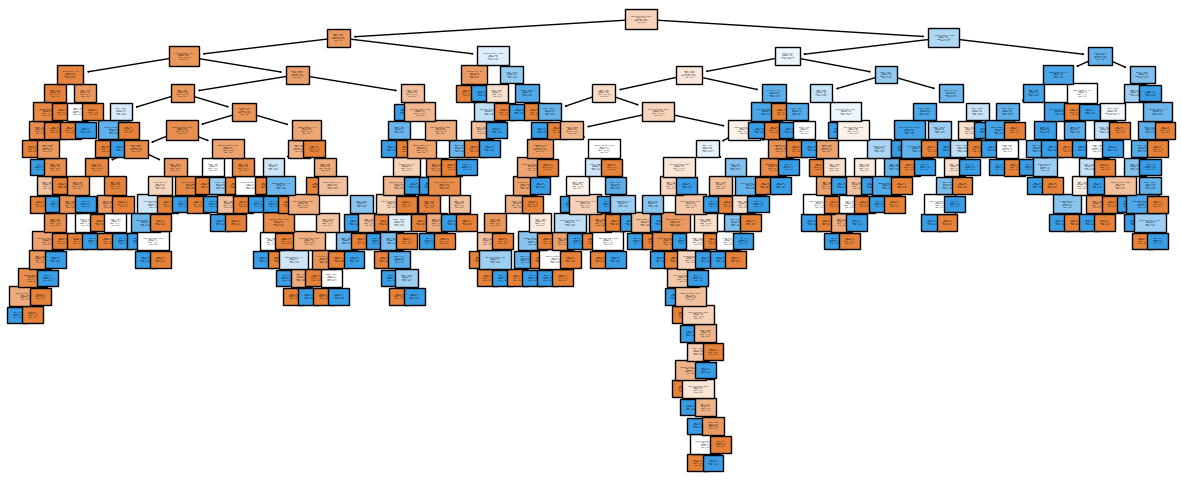

In [95]:
plt.figure(figsize=(15,6))
plot_tree(arvore, filled=True, class_names=['Não', 'Sim'], fontsize=1, feature_names=nome_colunas)

In [96]:
arvore.score(x_treino, y_treino)

1.0

In [97]:
arvore = DecisionTreeClassifier(max_depth= 3,random_state=5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [98]:
arvore.score(x_treino, y_treino)

0.7613038906414301

In [99]:
arvore.score(x_teste, y_teste)

0.7160883280757098

[Text(0.5, 0.875, 'tempo_ult_contato <= 248.5\ngini = 0.478\nsamples = 951\nvalue = [575, 376]\nclass = Não'),
 Text(0.25, 0.625, 'idade <= 59.5\ngini = 0.278\nsamples = 480\nvalue = [400, 80]\nclass = Não'),
 Text(0.125, 0.375, 'tempo_ult_contato <= 86.5\ngini = 0.253\nsamples = 458\nvalue = [390, 68]\nclass = Não'),
 Text(0.0625, 0.125, 'gini = 0.061\nsamples = 127\nvalue = [123, 4]\nclass = Não'),
 Text(0.1875, 0.125, 'gini = 0.312\nsamples = 331\nvalue = [267, 64]\nclass = Não'),
 Text(0.375, 0.375, 'tempo_ult_contato <= 142.0\ngini = 0.496\nsamples = 22\nvalue = [10, 12]\nclass = Sim'),
 Text(0.3125, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = Não'),
 Text(0.4375, 0.125, 'gini = 0.43\nsamples = 16\nvalue = [5, 11]\nclass = Sim'),
 Text(0.75, 0.625, 'tempo_ult_contato <= 628.5\ngini = 0.467\nsamples = 471\nvalue = [175, 296]\nclass = Sim'),
 Text(0.625, 0.375, 'superior <= 0.5\ngini = 0.499\nsamples = 312\nvalue = [148, 164]\nclass = Sim'),
 Text(0.5625, 0.125, 'gini

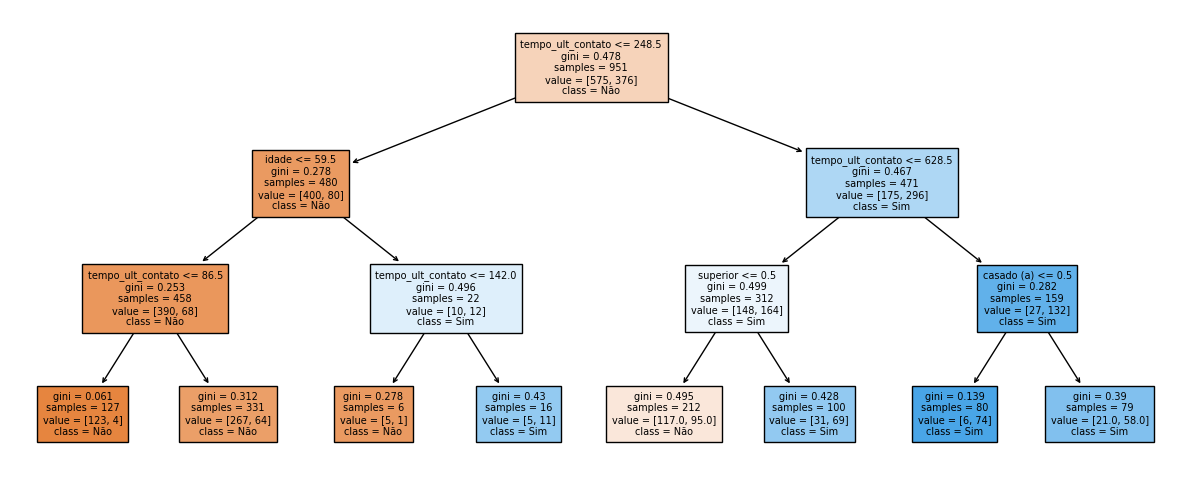

In [100]:
plt.figure(figsize=(15,6))
plot_tree(arvore, filled=True, class_names=['Não', 'Sim'], fontsize=7, feature_names=nome_colunas)

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [103]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
knn = KNeighborsClassifier()

In [106]:
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [107]:
x_teste_normalizado = normalizacao.transform(x_teste)

In [108]:
knn.score(x_teste_normalizado, y_teste)

0.6876971608832808

In [109]:
print(f'Acurácia dummy: {dummy.score(x_teste, y_teste)}')
print(f'Acurácia Arvore: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia KNN: {knn.score(x_teste_normalizado, y_teste)}')

Acurácia dummy: 0.6025236593059937
Acurácia Arvore: 0.7160883280757098
Acurácia KNN: 0.6876971608832808


In [110]:
import pickle

In [111]:
with open('modelo onehotenc.pkl', 'wb') as arquivo:
    pickle.dump(one_hot, arquivo)

In [112]:
with open('modelo arvore.pkl', 'wb') as arquivo:
    pickle.dump(arvore, arquivo)

In [113]:
novo_dado = {
    'idade': [45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}

In [114]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [115]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,solteiro (a),superior,nao,23040,nao,800,4


In [116]:
modelo_one_hot = pd.read_pickle('C:\\Users\igor0\Downloads\Área de Trabalho\Classificacao ML curso alura\Algoritmo-ML-de-classifica-o\modelo onehotenc.pkl')
modelo_arvore = pd.read_pickle('C:\\Users\igor0\Downloads\Área de Trabalho\Classificacao ML curso alura\Algoritmo-ML-de-classifica-o\modelo arvore.pkl')

In [117]:
novo_dado = modelo_one_hot.transform(novo_dado)
modelo_arvore.predict(novo_dado)

array([1])